<a href="https://colab.research.google.com/github/msribeiror29/Regression-Model/blob/main/Case_III_Regression_Model_for_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Developing a regression model for marketing.


#1.Import the Dataset / Understand the Data.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/MKT.csv')
df.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


# 2.Descriptive Analysis:
###This step involves exploring the dataset to gain a better understanding of the variables and to identify any issues.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.4 MB/s eta 0:00:00


#3.Exploratory Data Analysis (EDA):
###In this step, we will delve deeper into the data, uncovering relationships between variables and identifying relevant patterns using data visualization and statistical analysis techniques.


In [ ]:
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = px.box (df,"youtube")
fig.update_traces(line_color = 'Blue')

In [ ]:
fig = px.box (df,"facebook")
fig.update_traces(line_color = 'Blue')

In [ ]:
fig = px.box (df,"newspaper")
fig.update_traces(line_color = 'Blue')

In [ ]:
fig = px.box (df,"sales")
fig.update_traces(line_color = 'Blue')

###3.1 Analyzing the correlation and distribution of data.

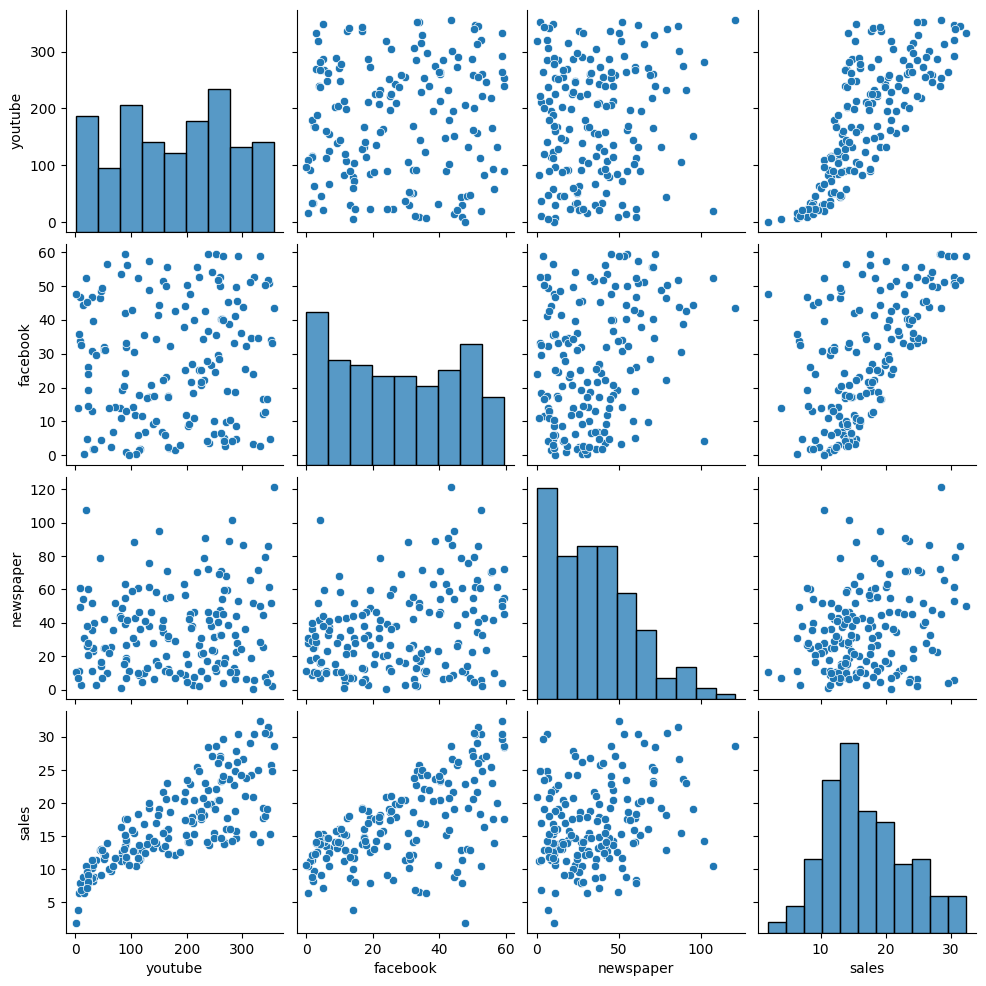

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

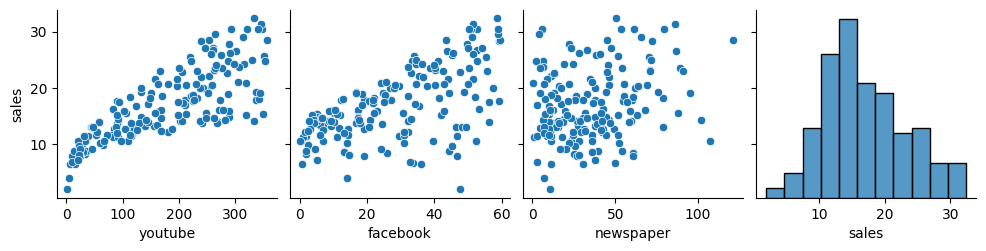

In [ ]:
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper', 'sales'], y_vars= ['sales'])

In [ ]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

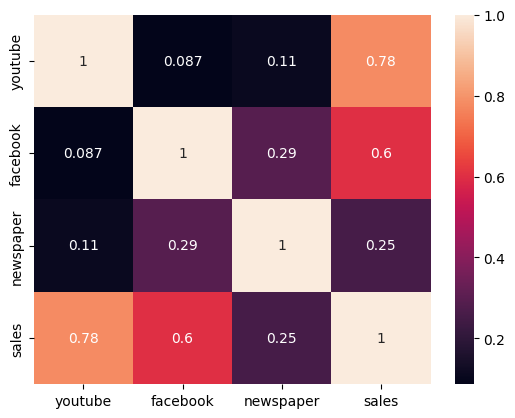

In [ ]:
sns.heatmap(df.corr(), annot = True)

###3.2 Sales Distribution.

<Axes: xlabel='sales', ylabel='Count'>

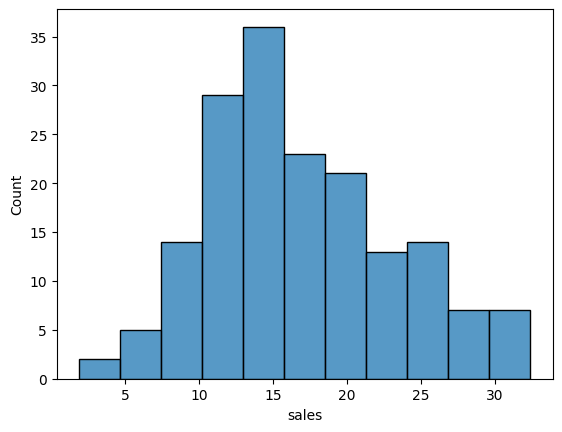

In [ ]:
sns.histplot(df['sales'])

# 4.Build the Regression Model:

###4.1 For this stage, we created a simple regression model to fulfill the company's forecasting needs, using the available data.

In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
X = df[['youtube','facebook','newspaper']]
Y = df[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 13)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


###4.2 Training the Model


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit (X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

###4.3 Calculating Prediction.

###To fulfill the company's demand, we will use the regression model created in the previous steps to predict the sales return that could result from a specific advertising investment. Subsequently, we will present this prediction to the company.

In [ ]:
from sklearn.metrics import r2_score
r = r2_score (Y_test, y_pred)

In [ ]:
print('r_quadrado:', r)

r_quadrado: 0.9047191979278819


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'sales')

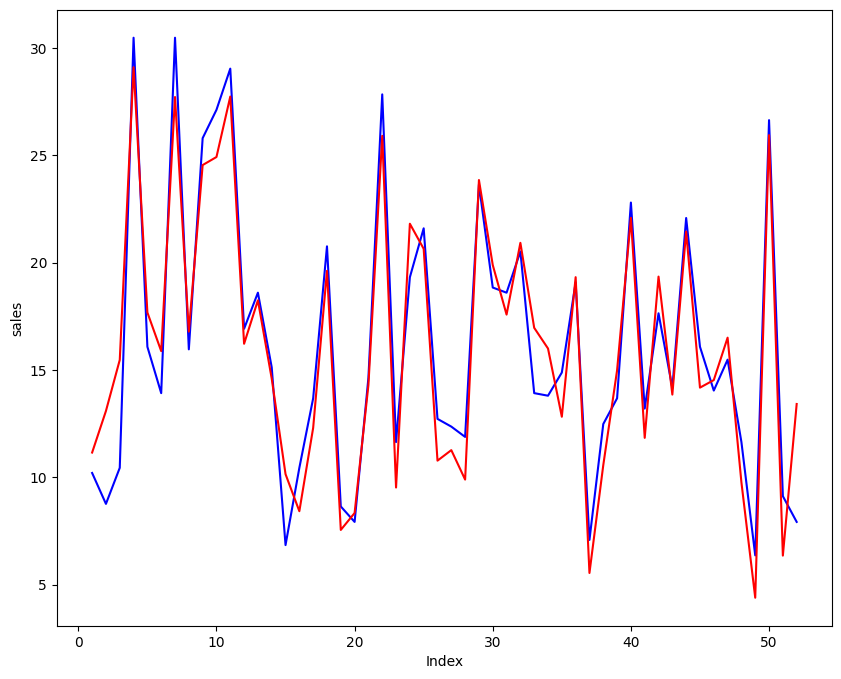

In [ ]:
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize = (10,8))
plt.plot(c, Y_test, color = 'blue')
plt.plot(c, y_pred, color = 'red')
plt.xlabel('Index')
plt.ylabel('sales')

###According to the plotted graph, a value closer to 1 indicates high linearity in the model. The calculated r-squared coefficient of determination is 90%.